# 3rd Lab of the _" Investment-Management-with-Python-and-Machine-Learning-Specialization"_

**Topic:** Max Drawdown

Aside volatility, another risk index is the **MAXIMUM DRAWDOWN** which is *the maximum loss from the previous high to a subsequent low*. 

A widely used ratio which has the *max drawdown* as denominator is the **CALMAR RATIO** which is defined as the _ratio_ of the *annualized return* over the *maximum drawdown over the trailing 36 months*.

### Computing Drawdowns

In order to compute drawdowns: 
    
- **1. Compute a wealth index**: this is basically the trend the investement had over the assessed period. 
- **2. Compute previous peaks**: this index accounts the maximums reached. It is a never decreasing line. 
- **3. Compute drawdown**: it is the difference between the wealth index and the previous peaks.

In [24]:
import pandas as pd
me_m = pd.read_csv(r'C:\Users\User\Desktop\Python\IM with Python\data\Portfolios_Formed_on_ME_monthly_EW.csv',
                     header = 0, index_col = 0, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [37]:
rets = me_m[['Lo 10', 'Hi 10']]
rets = rets/100
rets.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [38]:
rets.columns = ['Small Cap', 'Large Cap']
rets/100
rets.head()

,Small Cap,Large Cap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

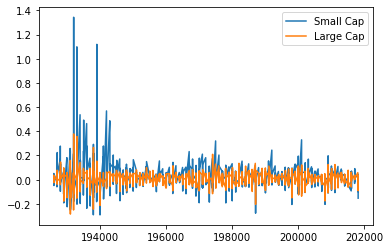

In [39]:
rets.plot()

In [40]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

As we can see, indexes are integers. In order to make our assessment, having them as dates is way more convenient. 

In [41]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head()

,Small Cap,Large Cap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270


In [42]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [43]:
rets.index = rets.index.to_period('M')
rets.head()

,Small Cap,Large Cap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


If interested in returns only for a specific year:

In [44]:
rets.loc["1975"]

,Small Cap,Large Cap
1975-01,0.3202,0.1286
1975-02,0.0657,0.0613
1975-03,0.0989,0.0414
1975-04,0.0288,0.0531
1975-05,0.0811,0.0610
1975-06,0.0779,0.0524
1975-07,0.0218,-0.0703
1975-08,-0.0525,-0.0177
1975-09,-0.0351,-0.0468
1975-10,-0.0009,0.0620


**1) COMPUTING THE WEALTH INDEX**

Let's suppose we start with USD 1000. In order to compute the wealth index of Large Cap stocks, we must multiply our beginning value by the compounded effect of each return.

In [59]:
wealth_index = 1000*(1+rets["Large Cap"]).cumprod()
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: Large Cap, Length: 1110, dtype: float64

<AxesSubplot:>

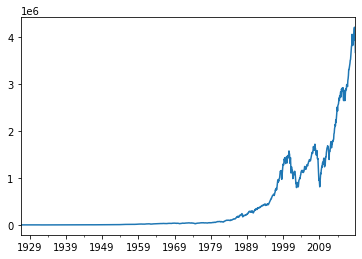

In [46]:
wealth_index.plot()

**2) COMPUTING PREVIOUS PEAKS**

When computing previous peaks, we want to keep track of the maximums reached. The **.cummax()** method is very useful to do so.

In [47]:
previous_peaks = wealth_index.cummax()

<AxesSubplot:>

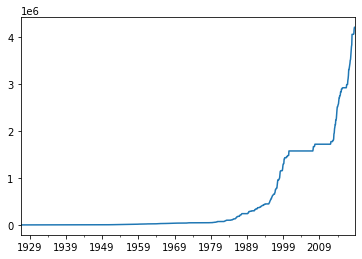

In [48]:
previous_peaks.plot()

**3) COMPUTING DRAWDOWNS**

It is very easy to compute drawdowns when the wealth index (W.I.) and previous peaks (P.P.) are known, in fact 
$$ D = W.I. - P.P. $$

In order to have a percentage drawdown:
    $$ D =\frac{W.I.-P.P.}{P.P.} $$

<AxesSubplot:>

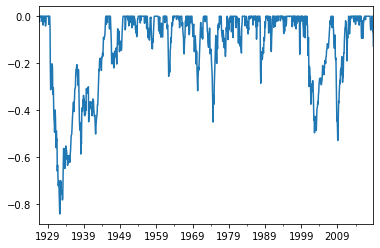

In [50]:
drawdown = (wealth_index-previous_peaks)/previous_peaks
drawdown.plot()

In [51]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: Large Cap, dtype: float64

If intersted in knowing how much was the **minimum drawdown and when** it took place:

In [52]:
drawdown.min()

-0.8400375277943123

In [53]:
drawdown.idxmin()

Period('1932-05', 'M')

If we want to know the same thing starting from 1975 for example: 

In [55]:
drawdown["1975":].min()

-0.5280945042309304

In [56]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

Let's **DEFINE a DRAWDOWN FUNCTION**.

The function is going to have in **input** a **time series of asset returns** and it computes and **outputs a DataFrame** that contains:
  1. **the wealth index**;
  2. **the previous peaks**;
  3. **the percent drawdowns**.

In [70]:
def drawdown(return_series: pd.Series):
    wealth_index=1000*(1+return_series).cumprod()
    previous_peaks=wealth_index.cummax()
    drawdowns=(wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame ({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

Now that we defined this function, we're able to use it in order to compute drawdowns of any series. Using this function with Large Cap series is going to output the same results we computed separately before.

In [71]:
drawdown(rets["Large Cap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [72]:
drawdown(rets["Large Cap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<AxesSubplot:>

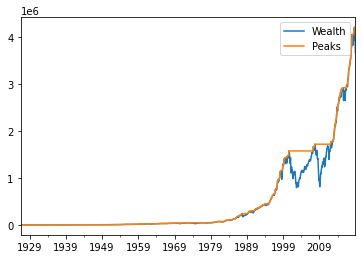

In [73]:
drawdown(rets["Large Cap"])[["Wealth", "Peaks"]].plot()

<AxesSubplot:>

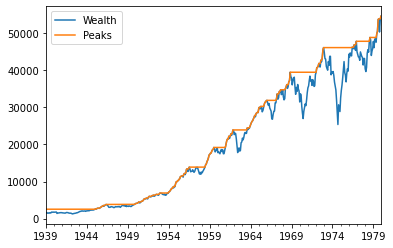

In [74]:
drawdown(rets["Large Cap"])[["Wealth", "Peaks"]]["1939":"1979"].plot()

In [75]:
drawdown(rets["Large Cap"])["Drawdown"].min()

-0.8400375277943123

The very useful thing about this function is that we just have to change the Large Cap series with the **Small Cap** one in order to assess its drawdowns.

In [76]:
drawdown(rets["Small Cap"]).head()

,Wealth,Peaks,Drawdown
1926-07,985.500000,985.500000,0.000000
1926-08,1035.957600,1035.957600,0.000000
1926-09,1045.592006,1045.592006,0.000000
1926-10,994.985353,1045.592006,-0.048400
1926-11,987.224467,1045.592006,-0.055822


We can make some comparisons between the two time series:

In [77]:
drawdown(rets["Small Cap"])["Drawdown"].min()

-0.8330007793945303

In [78]:
drawdown(rets["Large Cap"])["Drawdown"].min()

-0.8400375277943123

In [79]:
drawdown(rets["Large Cap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [80]:
drawdown(rets["Small Cap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

Basically in the same period, both Small Cap and Large Cap stocks had their minimum drawdown which was almost equivalent.

In [84]:
drawdown(rets["Large Cap"])["Drawdown"]["1940":].min()

-0.5280945042309304

In [83]:
drawdown(rets["Large Cap"])["Drawdown"]["1940":].idxmin()

Period('2009-02', 'M')

In [85]:
drawdown(rets["Small Cap"])["Drawdown"]["1940":].min()

-0.7000596091967913

In [86]:
drawdown(rets["Small Cap"])["Drawdown"]["1940":].idxmin()

Period('1974-12', 'M')

Starting from 1940 instead, minimum drawdowns of the series took place in different years and they had very different values.